In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import squarify as sq

In [3]:
df = pd.read_excel('datasets/Online Retail.xlsx')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


# Data Cleaning

In [4]:
print(f'Dataset has {df.shape[0]} observations and {df.shape[1]} features.')

Dataset has 541909 observations and 8 features.


In [6]:
df.drop(columns=['StockCode', 'CustomerID'], inplace=True)

In [8]:
df['Description'] = df['Description'].str.strip()
df.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [9]:
df.isnull().sum()

InvoiceNo         0
Description    1455
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

In [10]:
df.dropna(inplace=True)
print(f'Dataset has {df.shape[0]} observations and {df.shape[1]} features.')

Dataset has 540454 observations and 6 features.


In [11]:
df['InvoiceNo'].str.contains('C').value_counts() # Return transactions

True     9288
False       3
Name: InvoiceNo, dtype: int64

In [12]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df = df[-df['InvoiceNo'].str.contains('C')] # Removing all return invoices
print(f'Dataset has {df.shape[0]} observations and {df.shape[1]} features.')

Dataset has 531166 observations and 6 features.


In [13]:
df_duplicates = df[df.duplicated()]
print(f'Dataset has {df_duplicates.shape[0]} duplicates.')

Dataset has 5310 duplicates.


In [14]:
df =df.drop(df_duplicates.index)
print(f'Dataset has {df.shape[0]} observations and {df.shape[1]} features.')

Dataset has 525856 observations and 6 features.


In [15]:
postage = df['Description'] == 'POSTAGE'
postage.value_counts()

False    524730
True       1126
Name: Description, dtype: int64

In [16]:
df = df[-postage] # Removing postage pay from transactions
print(f'Dataset has {df.shape[0]} observations and {df.shape[1]} features.')

Dataset has 524730 observations and 6 features.


In [17]:
df.Country.value_counts()

United Kingdom          480895
Germany                   8653
France                    8093
EIRE                      7883
Spain                     2418
Netherlands               2326
Belgium                   1935
Switzerland               1928
Portugal                  1462
Australia                 1183
Norway                    1052
Channel Islands            747
Italy                      741
Finland                    648
Cyprus                     601
Unspecified                442
Sweden                     428
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     291
Hong Kong                  278
Singapore                  222
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
RSA                         58
European Community          57
Lebanon 

In [18]:
countries = ['Germany', 'France', 'Spain', 'Netherlands', 'Belgium']
df = df[df['Country'].isin(countries)].reset_index(drop=True)
print(f'Dataset has {df.shape[0]} observations and {df.shape[1]} features.')

Dataset has 23425 observations and 6 features.


# EDA

In [19]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice
0,536370,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,France,90.0
1,536370,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,France,90.0
2,536370,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,France,45.0
3,536370,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,France,10.2
4,536370,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,France,15.6


In [20]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Hour'] = df['InvoiceDate'].dt.hour
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['DayName'] = df['InvoiceDate'].dt.day_name()
df.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice,Year,Month,Hour,DayOfWeek,DayName
0,536370,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,France,90.0,2010,12,8,2,Wednesday
1,536370,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,France,90.0,2010,12,8,2,Wednesday
2,536370,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,France,45.0,2010,12,8,2,Wednesday
3,536370,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,France,10.2,2010,12,8,2,Wednesday
4,536370,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,France,15.6,2010,12,8,2,Wednesday


In [21]:
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['DayName'] = df['DayName'].replace(day_names, range(7))

Text(0, 0.5, 'Total Sales')

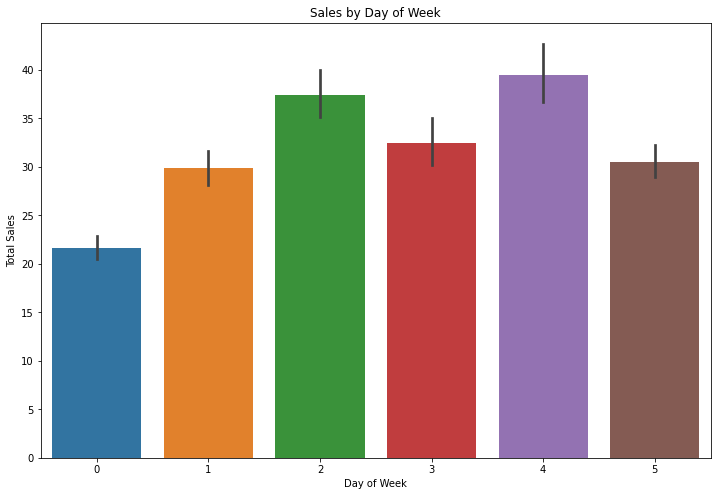

In [23]:
plt.figure(figsize=(12, 8))

sns.barplot(x='DayName', y='TotalPrice', data=df)
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')

In [24]:
pivot_df = df.pivot_table(index='Month',
                          columns='DayName',
                          values='TotalPrice',
                          aggfunc='mean')
pivot_df

DayName,0,1,2,3,4,5
Month,,,,,,
1,26.025000,24.766365,46.299746,40.338789,22.085097,38.347284
2,23.150000,74.194207,45.645154,18.233016,22.741106,25.395356
3,19.602969,18.164542,57.338449,27.440779,37.088345,27.024802
4,18.649273,20.037667,44.058643,30.422222,22.354359,23.642424
5,18.302639,21.383593,22.520855,34.793415,71.900937,24.977168
6,40.425342,18.821746,73.415069,38.850478,16.218297,31.145503
7,17.645641,32.434065,16.347103,19.859714,28.868000,18.439963
8,12.416514,24.139852,45.434715,29.926565,52.648891,39.625314
9,17.497778,60.180836,54.367273,18.050346,26.593925,23.590600


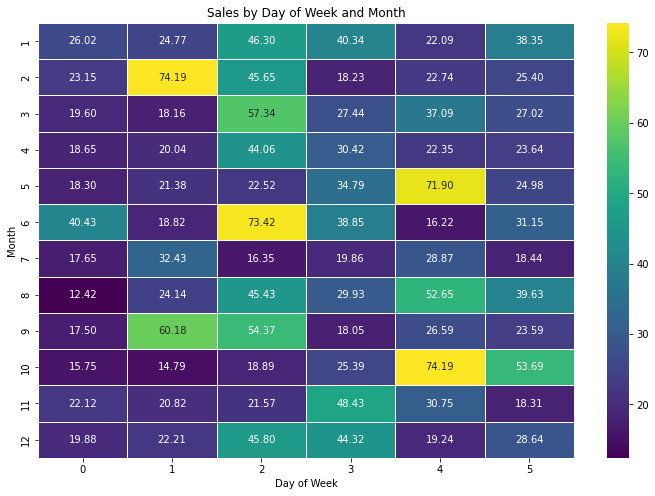

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt='.2f', linewidths=1, cmap='viridis')
plt.title('Sales by Day of Week and Month')
plt.ylabel('Month')
plt.xlabel('Day of Week');

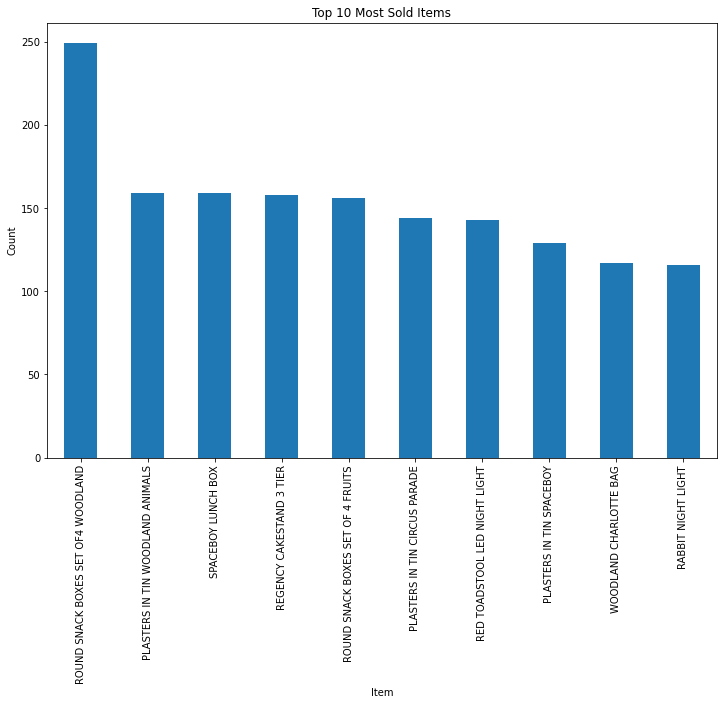

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
df['Description'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', ax=ax)
plt.title('Top 10 Most Sold Items')
plt.xlabel('Item')
plt.ylabel('Count');

Text(0.5, 1.0, 'Top 10 Most Sold Items')

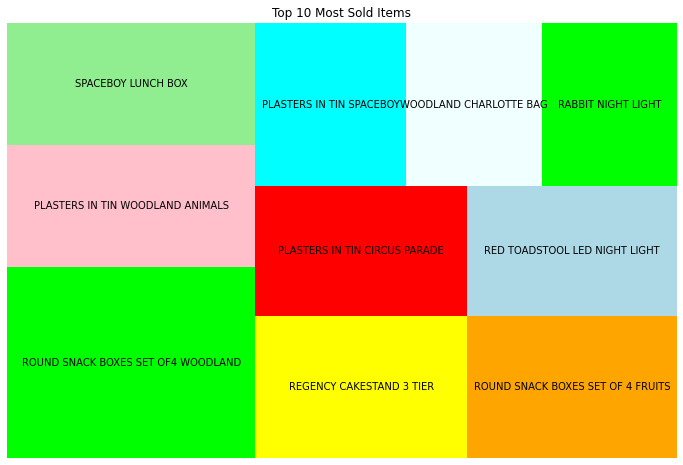

In [29]:
plt.figure(figsize=(12, 8))
x = df['Description'].value_counts().sort_values(ascending=False).head(10)
color = 'lime pink lightgreen yellow orange red lightblue cyan azure'.split(' ')
sq.plot(sizes=x, label=x.index, color=color).axis('off')
plt.title('Top 10 Most Sold Items')

In [30]:
df = df[['InvoiceNo', 'Description']]
df.head()

,InvoiceNo,Description
0,536370,ALARM CLOCK BAKELIKE PINK
1,536370,ALARM CLOCK BAKELIKE RED
2,536370,ALARM CLOCK BAKELIKE GREEN
3,536370,PANDA AND BUNNIES STICKER SHEET
4,536370,STARS GIFT TAPE


In [31]:
itemsets = df.groupby('InvoiceNo').agg(','.join).reset_index()
itemsets.head()

,InvoiceNo,Description
0,536370,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE..."
1,536403,HAND WARMER BIRD DESIGN
2,536527,"SET OF 6 T-LIGHTS SANTA,ROTATING SILVER ANGELS..."
3,536840,"JAM MAKING SET PRINTED,JAM JAR WITH PINK LID,J..."
4,536852,"PICTURE DOMINOES,MINI JIGSAW SPACEBOY,MINI JIG..."


In [32]:
itemsets.to_csv('datasets/itemsets.csv', index=False)

# Transaction Encoding

In [33]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [39]:
item_list = itemsets['Description'].apply(lambda x: x.split(',')).tolist()
item_list[:2]

[['ALARM CLOCK BAKELIKE PINK',
  'ALARM CLOCK BAKELIKE RED',
  'ALARM CLOCK BAKELIKE GREEN',
  'PANDA AND BUNNIES STICKER SHEET',
  'STARS GIFT TAPE',
  'INFLATABLE POLITICAL GLOBE',
  'VINTAGE HEADS AND TAILS CARD GAME',
  'SET/2 RED RETROSPOT TEA TOWELS',
  'ROUND SNACK BOXES SET OF4 WOODLAND',
  'SPACEBOY LUNCH BOX',
  'LUNCH BOX I LOVE LONDON',
  'CIRCUS PARADE LUNCH BOX',
  'CHARLOTTE BAG DOLLY GIRL DESIGN',
  'RED TOADSTOOL LED NIGHT LIGHT',
  'SET 2 TEA TOWELS I LOVE LONDON',
  'VINTAGE SEASIDE JIGSAW PUZZLES',
  'MINI JIGSAW CIRCUS PARADE',
  'MINI JIGSAW SPACEBOY',
  'MINI PAINT SET VINTAGE'],
 ['HAND WARMER BIRD DESIGN']]

In [40]:
te = TransactionEncoder()
te_array = te.fit(item_list).transform(item_list)
te_array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [41]:
item_df = pd.DataFrame(te_array, columns=te.columns_)
item_df.head()

,,1 HANGER,BACK DOOR,BILLBOARD FONTS DESIGN,BIRTHDAY CARD,BREAKFAST IN BED,CHOCOLATE SPOTS,DOUGHNUTS,NEW ENGLAND,OVERCROWDED POOL.,...,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
print(f'Dataset has {item_df.shape[0]} transactions and {item_df.shape[1]} items.')

Dataset has 1116 transactions and 2369 items.


In [44]:
item_df[""].value_counts() # This column is result of applying the split function to the Description column

False    1092
True       24
Name: , dtype: int64

In [45]:
item_df.drop(columns=[''], inplace=True)
item_df.head()

,1 HANGER,BACK DOOR,BILLBOARD FONTS DESIGN,BIRTHDAY CARD,BREAKFAST IN BED,CHOCOLATE SPOTS,DOUGHNUTS,NEW ENGLAND,OVERCROWDED POOL.,PINK SPOTS,...,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Association Rules

In [46]:
pd.set_option('display.max_colwidth', None)

In [47]:
frequent_items = apriori(item_df, min_support=0.1, use_colnames=True)
frequent_items

,support,itemsets
0,0.103047,(PACK OF 72 RETROSPOT CAKE CASES)
1,0.129032,(PLASTERS IN TIN CIRCUS PARADE)
2,0.115591,(PLASTERS IN TIN SPACEBOY)
3,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
4,0.103943,(RABBIT NIGHT LIGHT)
5,0.128136,(RED TOADSTOOL LED NIGHT LIGHT)
6,0.141577,(REGENCY CAKESTAND 3 TIER)
7,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
8,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
9,0.142473,(SPACEBOY LUNCH BOX)


In [48]:
frequent_items.sort_values('support', ascending=False)

,support,itemsets
8,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
3,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
9,0.142473,(SPACEBOY LUNCH BOX)
6,0.141577,(REGENCY CAKESTAND 3 TIER)
7,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
1,0.129032,(PLASTERS IN TIN CIRCUS PARADE)
5,0.128136,(RED TOADSTOOL LED NIGHT LIGHT)
2,0.115591,(PLASTERS IN TIN SPACEBOY)
11,0.107527,"(ROUND SNACK BOXES SET OF 4 FRUITS, ROUND SNACK BOXES SET OF4 WOODLAND)"
10,0.104839,(WOODLAND CHARLOTTE BAG)


In [50]:
frequent_items = apriori(item_df, min_support=0.02, use_colnames=True)
frequent_items.sort_values('support', ascending=False)

,support,itemsets
197,0.223118,(ROUND SNACK BOXES SET OF4 WOODLAND)
247,0.142473,(SPACEBOY LUNCH BOX)
154,0.142473,(PLASTERS IN TIN WOODLAND ANIMALS)
183,0.141577,(REGENCY CAKESTAND 3 TIER)
196,0.139785,(ROUND SNACK BOXES SET OF 4 FRUITS)
...,...,...
301,0.020609,"(DOLLY GIRL LUNCH BOX, CHARLOTTE BAG DOLLY GIRL DESIGN)"
296,0.020609,"(PLASTERS IN TIN WOODLAND ANIMALS, CHARLOTTE BAG APPLES DESIGN)"
285,0.020609,"(PLASTERS IN TIN SPACEBOY, ALARM CLOCK BAKELIKE RED)"
415,0.020609,"(LUNCH BAG RED RETROSPOT, RED RETROSPOT PICNIC BAG)"


In [51]:
assoc_rules = association_rules(frequent_items, metric='support', min_threshold=0.1)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.139785,0.223118,0.107527,0.769231,3.447637,0.076338,3.366487
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.223118,0.139785,0.107527,0.481928,3.447637,0.076338,1.660415


In [52]:
assoc_rules = association_rules(frequent_items, metric='confidence', min_threshold=1)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.0,26.571429,0.026732,inf
1,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.0,28.615385,0.024213,inf
2,"(SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL PAPER PLATES)",(SET/6 RED SPOTTY PAPER PLATES),0.021505,0.077957,0.021505,1.0,12.827586,0.019829,inf
3,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.0,28.615385,0.023348,inf
4,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.024194,0.037634,0.024194,1.0,26.571429,0.023283,inf


In [53]:
assoc_rules = association_rules(frequent_items, metric='confidence', min_threshold=0.9)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(DOLLY GIRL CHILDRENS CUP),(DOLLY GIRL CHILDRENS BOWL),0.034946,0.037634,0.032258,0.923077,24.527473,0.030943,12.510753
1,(JAM JAR WITH GREEN LID),(JAM JAR WITH PINK LID),0.022401,0.041219,0.021505,0.960000,23.290435,0.020582,23.969534
2,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.000000,26.571429,0.026732,inf
3,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,0.024213,inf
4,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.025090,0.903226,24.000000,0.024044,9.944444
5,"(DOLLY GIRL CHILDRENS BOWL, ROUND SNACK BOXES SET OF4 WOODLAND)",(SPACEBOY CHILDRENS BOWL),0.021505,0.050179,0.020609,0.958333,19.098214,0.019530,22.795699
6,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",(SPACEBOY CHILDRENS BOWL),0.025090,0.050179,0.024194,0.964286,19.216837,0.022935,26.594982
7,"(PLASTERS IN TIN WOODLAND ANIMALS, LUNCH BAG SPACEBOY DESIGN)",(PLASTERS IN TIN SPACEBOY),0.027778,0.115591,0.025986,0.935484,8.093023,0.022775,13.708333
8,"(PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL PAPER NAPKINS)",(PACK OF 6 SKULL PAPER PLATES),0.027778,0.035842,0.025090,0.903226,25.200000,0.024094,9.962963
9,"(PACK OF 20 SKULL PAPER NAPKINS, PACK OF 6 SKULL PAPER PLATES)",(PACK OF 6 SKULL PAPER CUPS),0.027778,0.038530,0.025090,0.903226,23.441860,0.024019,9.935185


In [54]:
assoc_rules = association_rules(frequent_items, metric='lift', min_threshold=28)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,0.024213,inf
1,(DOLLY GIRL CHILDRENS CUP),"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",0.034946,0.025090,0.025090,0.717949,28.615385,0.024213,3.456500
2,"(POPPY'S PLAYHOUSE BEDROOM, POPPY'S PLAYHOUSE KITCHEN)",(POPPY'S PLAYHOUSE LIVINGROOM),0.027778,0.025090,0.020609,0.741935,29.571429,0.019912,3.777778
3,(POPPY'S PLAYHOUSE LIVINGROOM),"(POPPY'S PLAYHOUSE BEDROOM, POPPY'S PLAYHOUSE KITCHEN)",0.025090,0.027778,0.020609,0.821429,29.571429,0.019912,5.444444
4,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.000000,28.615385,0.023348,inf
5,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)","(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",0.025090,0.027778,0.024194,0.964286,34.714286,0.023497,27.222222
6,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)","(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",0.027778,0.025090,0.024194,0.870968,34.714286,0.023497,7.555556
7,(DOLLY GIRL CHILDRENS CUP),"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",0.034946,0.024194,0.024194,0.692308,28.615385,0.023348,3.171371


In [56]:
assoc_rules = association_rules(frequent_items, metric='support', min_threshold=0.02)
print(f'{assoc_rules.shape[0]} association rules satisfying the minimum threshold.')
assoc_rules[(assoc_rules['confidence'] >= 0.9) & (assoc_rules['lift'] >= 25)] \
    .sort_values('confidence', ascending=False)

1188 association rules satisfying the minimum threshold.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
680,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",(DOLLY GIRL CHILDRENS BOWL),0.027778,0.037634,0.027778,1.000000,26.571429,0.026732,inf
685,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS CUP),0.025090,0.034946,0.025090,1.000000,28.615385,0.024213,inf
1106,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS CUP),0.024194,0.034946,0.024194,1.000000,28.615385,0.023348,inf
1107,"(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)",(DOLLY GIRL CHILDRENS BOWL),0.024194,0.037634,0.024194,1.000000,26.571429,0.023283,inf
1110,"(DOLLY GIRL CHILDRENS BOWL, SPACEBOY CHILDRENS CUP)","(DOLLY GIRL CHILDRENS CUP, SPACEBOY CHILDRENS BOWL)",0.025090,0.027778,0.024194,0.964286,34.714286,0.023497,27.222222
870,"(SET/6 RED SPOTTY PAPER PLATES, PACK OF 20 SKULL PAPER NAPKINS)",(PACK OF 6 SKULL PAPER PLATES),0.022401,0.035842,0.021505,0.960000,26.784000,0.020702,24.103943
1038,"(POPPY'S PLAYHOUSE BEDROOM, POPPY'S PLAYHOUSE LIVINGROOM)",(POPPY'S PLAYHOUSE KITCHEN),0.021505,0.037634,0.020609,0.958333,25.464286,0.019800,23.096774
1040,"(POPPY'S PLAYHOUSE LIVINGROOM, POPPY'S PLAYHOUSE KITCHEN)",(POPPY'S PLAYHOUSE BEDROOM),0.022401,0.034946,0.020609,0.920000,26.326154,0.019826,12.063172
864,"(PACK OF 6 SKULL PAPER CUPS, PACK OF 20 SKULL PAPER NAPKINS)",(PACK OF 6 SKULL PAPER PLATES),0.027778,0.035842,0.025090,0.903226,25.200000,0.024094,9.962963


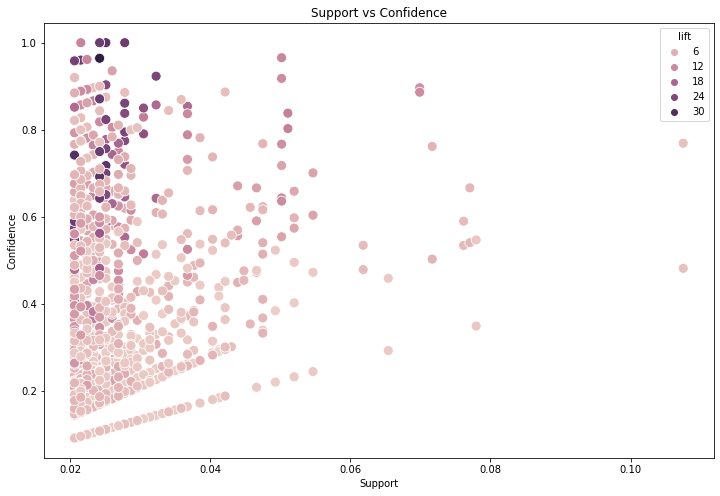

In [57]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='support',
                y='confidence',
                hue='lift',
                s=100,
                data=assoc_rules)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence');

In [58]:
type(assoc_rules['antecedents'][0])

frozenset

In [74]:
assoc_rules[assoc_rules['antecedents'] == ("REGENCY CAKESTAND 3 TIER")]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
